In [1]:
# Import libraries
!pip install -Uqq fastbook
from fastbook import *

/home/momir/.local/lib/python3.8/site-packages/torch/cuda/__init__.py:52: UserWarning: CUDA initialization: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx (Triggered internally at  /pytorch/c10/cuda/CUDAFunctions.cpp:100.)
  return torch._C._cuda_getDeviceCount() > 0


In [2]:
key = os.environ.get('AZURE_SEARCH_KEY', '65dbb31bfde7494fa5e755999843a7dc')

In [3]:
search_images_bing

NameError: name 'search_images_bing' is not defined

In [4]:
results = search_images_bing(key, 'budgie')
ims = results.attrgot('contentUrl')
len(ims)

NameError: name 'search_images_bing' is not defined

In [5]:
dest = 'images/budgie.jpg'
dest_path = Path('images')
if not dest_path.exists():
    dest_path.mkdir()
download_url(ims[0], dest)
ims

NameError: name 'ims' is not defined

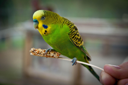

In [8]:
img = Image.open(dest)
img.to_thumb(128,128)

In [9]:
parrot_types = 'budgie', 'cockatiel', 'rosy-faced lovebird', 'cockatoo', 'rosella parakeet', 'parrotlet'
path = Path('parrots')

In [10]:
if not path.exists():
    path.mkdir()
    for o in parrot_types:
        dest = (path/o)
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, o)
        download_images(dest, urls=results.attrgot('contentUrl'))

In [11]:
fns = get_image_files(path)
fns

(#866) [Path('parrots/budgie/00000094.jpg'),Path('parrots/budgie/00000069.jpg'),Path('parrots/budgie/00000070.jpg'),Path('parrots/budgie/00000105.jpg'),Path('parrots/budgie/00000090.jpg'),Path('parrots/budgie/00000137.jpg'),Path('parrots/budgie/00000112.JPG'),Path('parrots/budgie/00000073.png'),Path('parrots/budgie/00000061.jpg'),Path('parrots/budgie/00000047.jpg')...]

In [12]:
failed = verify_images(fns)
failed

(#6) [Path('parrots/budgie/00000021.jpg'),Path('parrots/budgie/00000044.jpg'),Path('parrots/budgie/00000081.jpg'),Path('parrots/cockatoo/00000036.jpg'),Path('parrots/cockatoo/00000079.jpg'),Path('parrots/parrotlet/00000035.jpg')]

In [13]:
failed.map(Path.unlink);

In [14]:
parrots = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [15]:
dls = parrots.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


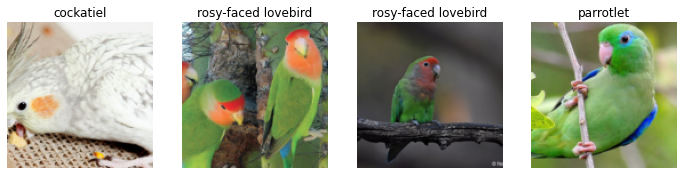

In [16]:
dls.valid.show_batch(max_n=4, nrows=1)

In [17]:
parrots = parrots.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5),
    batch_tfms=aug_transforms())
dls = parrots.dataloaders(path)

In [18]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.078919,0.416072,0.156977,02:34


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.683706,0.222741,0.063953,03:29
1,0.469402,0.139763,0.052326,03:26
2,0.338600,0.126255,0.046512,03:26
3,0.266564,0.124674,0.052326,03:27


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


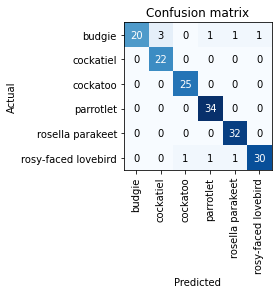

In [19]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

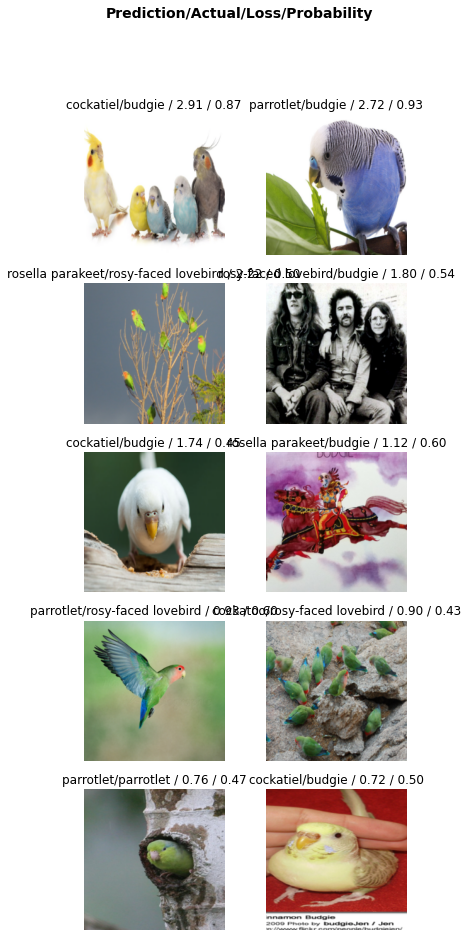

In [22]:
interp.plot_top_losses(10, nrows=5)

In [23]:
learn.export()

In [24]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]